# La roue des émotions

Construit d’après les travaux du psychologue américain Robert Plutchik, la roue des émotions est un modèle des émotions humaines et peut facilement servir à définir des personnages, ainsi que leur évolution dans une trame narrative.

Depuis quelques années, les dispositifs de communication médiatisée par ordinateur (CMO) sont massivement utilisés, aussi bien dans les activités professionnelles que personnelles. Ces dispositifs permettent à des participants distants physiquement de communiquer. La plupart implique une communication écrite médiatisée par ordinateur (CEMO) : forums de discussion, courrier électronique, messagerie instantanée. Les participants ne s’entendent pas et ne se voient pas mais peuvent communiquer par l’envoi de messages écrits, qui combinent, généralement, certaines caractéristiques des registres écrit et oral (Marcoccia, 2000a ; Marcoccia, Gauducheau, 2007 ; Riva, 2001).

Imaginez que vous souhaitez savoir ce qui se passe derrière votre écran ordinateur, qui sont vos contacts les plus actifs et quelle est leur personnalité (pas banal comme question !!). Vous allez alors vous lancer dans l’analyse de leur narration et tenter d’extraire quelle émotion se dégage de chacune des phrases.

Chez Simplon nous utilisons tous les jours des outils de discussion textuels et nous construisons nos relations sociales et professionnelles autour de ces dispositifs. Pour entretenir des rapports sociaux stables, sereins, de confiance et efficaces, au travers des outils de communication écrites, lorsqu'il n'est pas possible d'avoir la visio (avec caméra), il est nécessaire de détecter des éléments "clés" dans les channels de discussions / mails qui nous permettront de déceler de la colère, de la frustration, de la tristesse ou encore de la joie de la part d'un collègue ou d'un amis pour adapter nos relations sociales.
En tant qu'expert en data science, nous allons vous demander de développer un modèle de machine learning permettant de classer les phrases suivant l'émotion principale qui en ressort.

Pour des questions d’ordre privé, nous ne vous demanderons pas de nous communiquer les conversations provenant de votre réseau social favori ou de vos emails mais nous allons plutôt vous proposer deux jeux de données contenant des phrases, ces fichiers ayant déjà été annoté.

Vous devrez proposer plusieurs modèles de classification des émotions et proposer une analyse qualitative et quantitative de ces modèles en fonction de critères d'évaluation. Vous pourrez notamment vous appuyer sur les outils de reporting des librairies déjà étudiées. Vous devrez investiguer aux travers de librairies d'apprentissage automatique standards et de traitement automatique du langage naturel comment obtenir les meilleurs performance de prédiction possible en prenant en compte l'aspect multi-class du problème et en explorant l'impact sur la prédiction de divers prétraitement tel que la suppression des **stop-words**, la **lemmatisation** et l'utilisation de **n-grams**, et différente approche pour la vectorisation.

Vous devrez travailler dans **un premier temps** avec le jeu de données issue de [Kaggle](https://www.kaggle.com/ishantjuyal/emotions-in-text) pour réaliser vos apprentissage et l'évaluation de vos modèles.

Dans l'objectif d'enrichir notre prédictions nous souhaitons augmenter notre jeux de donneés.
Vous devrez donc travailler dans un **deuxième temps** avec le jeux de données fournie, issue de [data.world](https://data.world/crowdflower/sentiment-analysis-in-text) afin de  :
1. comparer d'une part si les résultats de classification sur votre premier jeux de données sont similaire avec le second. Commentez.
2. Combiner les deux jeux données pour tenter d'améliorer vos résultats de prédiction.
3. Prédire les nouvelles émotions présente dans ce jeux de données sur les message du premier, et observer si les résultats sont pertinent.

Vous devrez ensuite présenter vos résultats sous la forme d'un dashboard muli-pages Dash.
La première page du Dashboard sera dédiée à l'analyse et au traitement des données. Vous pourrez par exemple présenter les données "brut" sous la forme d'un tableau puis les données pré-traitées dans le même tableau avec un bouton ou menu déroulant permettant de passer d'un type de données à un autre (n'afficher qu'un échantillon des résultats, on dans une fenetre "scrollable"). Sur cette première page de dashboard seront accessibles vos graphiques ayant trait à votre première analyse de données (histogramme, bubble chart, scatterplot etc), notamment
* l'histogramme représentant la fréquence d’apparition des mots (commentez)
* l'histogramme des émotions (commentez)

Une deuxième page du Dashboard sera dédiée aux résultats issues des classifications . Il vous est demandé de comparer les résultats d'au moins 5 classifiers qu présenterai dans un tableau permettant de visualiser vos mesures. Sur cette page de dashboard pourra se trouver par exemple, des courbes de rappel de précision (permette de tracer la précision et le rappel pour différents seuils de probabilité), un rapport de classification (un rapport de classification visuel qui affiche la precision, le recall, le f1-score, support, ou encore une matrice de confusion ou encore une graphique permettant de visualiser les mots les plus représentatif associé à chaque émotions.

 Héberger le dashboard sur le cloud de visualisation de données Héroku (https://www.heroku.com/)

Vos travaux devront être “poussés” sur Github au plus tard le Jeudi 17 Décembre à 17h30 (le lien sera accessible via simplonline). Les rendus tardifs ne seront pas pris en compte et les compétences ne seront donc pas validées !

**BONUS**

Créer une application client/serveur permettant à un utilisateur d'envoyer du texte via un champs de recherche (ou un fichier sur le disque du client) et de lui renvoyer
1. l'émotion du texte envoyé.
2. (bonus du bonus) la roue des émotions du document (exemple: quelle proportion de chacune des émotions contient le document ?)


## Livrables

* notebook résumant votre travaille
* ressource heroku
* (bonus) votre application client/serveur

## Modalité pédagogique

Travaille en groupe de 5/6 + roles  
durée: 7 jours


## ressources

* https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/
* https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
* https://medium.com/neuronio/from-sentiment-analysis-to-emotion-recognition-a-nlp-story-bcc9d6ff61ae
* https://realpython.com/sentiment-analysis-python/#how-classification-works


In [2]:
from time import time
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

# GLOBAL VARIBLES
df = pd.read_csv("datasets/Emotion_final.csv")
df2 = pd.read_csv("datasets/text_emotion.csv")
#nltk.download()
#stopwords = nltk.corpus.stopwords.words("english")

In [3]:
print("----------------------------")
print("First lines of the dataframe")
print("----------------------------")
df.head()

----------------------------
First lines of the dataframe
----------------------------


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
print("Dimension :", df.shape, "\n-----------")
print("\nDatas format :\n--------------\n", df.dtypes)
print("\n# of empty cells :\n------------------\n", df.isnull().sum())
print("\nValues of the emotion column :\n------------------------------\n", df.Emotion.unique())

df_author = df.groupby(['Emotion']).size().sort_values()
print("\nEmotion's word frequency in the df :\n------------------------------------\n", df_author)

Dimension : (21459, 2) 
-----------

Datas format :
--------------
 Text       object
Emotion    object
dtype: object

# of empty cells :
------------------
 Text       0
Emotion    0
dtype: int64

Values of the emotion column :
------------------------------
 ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']

Emotion's word frequency in the df :
------------------------------------
 Emotion
surprise     879
love        1641
fear        2652
anger       2993
sadness     6265
happy       7029
dtype: int64


<bound method Series.keys of Emotion
surprise     879
love        1641
fear        2652
anger       2993
sadness     6265
happy       7029
dtype: int64>

In [9]:
targets = df["Emotion"]
corpus = df["Text"]

Vocabulary size : 19070
-----------------

Tracé de la distribution de mots du premier jeu de données (Kaggle) :
---------------------------------------------------------------------


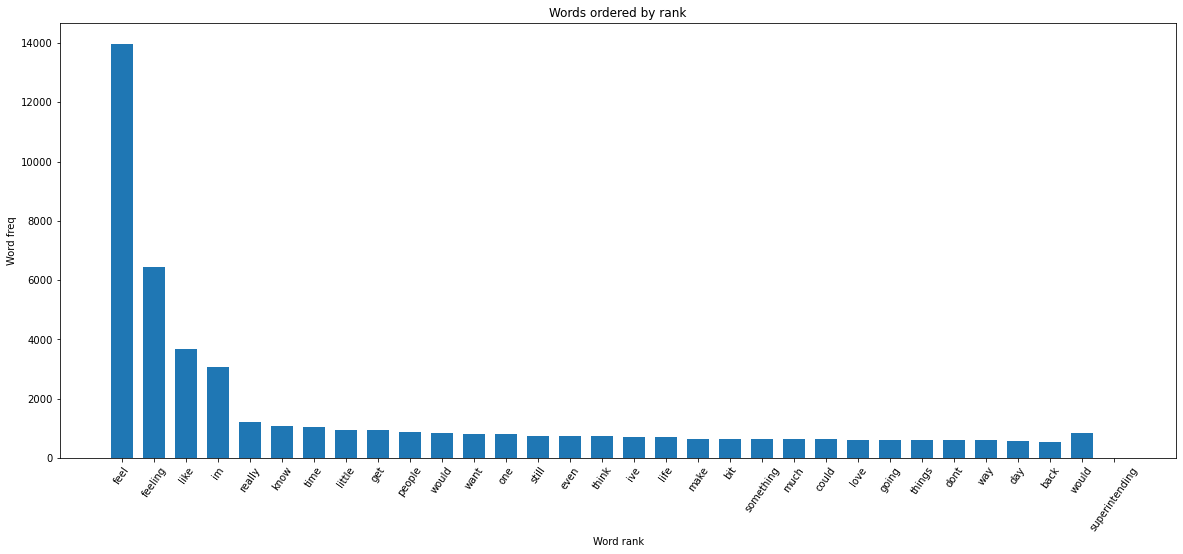

In [10]:
# Vobabulary analysis
stopwords = nltk.corpus.stopwords.words('english')
vec = CountVectorizer(stop_words=stopwords)
X = vec.fit_transform(corpus)
words = vec.get_feature_names()

print("Vocabulary size : %d\n-----------------\n" % len(words) )
print("Tracé de la distribution de mots du premier jeu de données (Kaggle) :\n---------------------------------------------------------------------")

wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

def subsample(x, step=15000):
    return np.hstack((x[:30], x[10::step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('Word rank')
plt.ylabel('Word freq')
plt.title("Words ordered by rank");

In [185]:
pipe0 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer()),
    ('svm', SVC(kernel='linear')),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('sgd', SGDClassifier(max_iter=5000)),
])
pipe21 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svl', LinearSVC(max_iter=5000)),
])
pipe30 = Pipeline([
    ('feat', FeatureUnion([
        ("decomposition", Pipeline([
                ("c", CountVectorizer(stop_words=stopwords, min_df=3)),
                ('lda', LatentDirichletAllocation(n_components=25)),
        ])),
        ("tfidf", Pipeline([
                ("c", CountVectorizer(ngram_range=(1,2))),
                ('t', TfidfTransformer()),            
        ]))
    ])),
    ('sgd', SGDClassifier(max_iter=5000, tol=1e-4)),
])
pipe31 = Pipeline([
    ('vect', CountVectorizer()),
    ('svml', LinearSVC(max_iter=2000)),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SVC(kernel='linear')),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression(max_iter=2000)),
])
pipe51 = Pipeline([
    ('vect', CountVectorizer()),
    ('logit', LogisticRegression(max_iter=2000)),
])
pipe6 = Pipeline([
    ('vect', CountVectorizer()),
    ('mult_nb', MultinomialNB()),
])
pipe61 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('mult_nb', MultinomialNB()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer()),
    ('compl_nb', ComplementNB()),
])
pipe71 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('compl_nb', ComplementNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer()),
    ('bern_nb', BernoulliNB()),
])
pipe81 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('bern_nb', BernoulliNB()),
])

In [186]:
def run_pipes(pipes, splits=10, test_size=0.2, seed=42):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y, average="macro") # "macro" average gives better results
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": [arr[:,1].mean().round(5), arr[:,1].std().round(5)], #round precision highered from 3 to 5
         }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df

In [63]:
res = run_pipes([pipe0, pipe2, pipe30, pipe1, pipe4, pipe51, pipe31, pipe3, pipe6, pipe61, pipe7, pipe71, pipe8, pipe81], splits=5)
print_table(res)

,time,f1_score
vect-sgd,0.69,"[0.8507, 0.00407]"
vect-tfidf-sgd,0.58,"[0.85242, 0.00422]"
feat-sgd,43.63,"[0.83604, 0.00779]"
vect-svm,45.62,"[0.84242, 0.00382]"
vect-tfidf-svm,56.35,"[0.84436, 0.0061]"
vect-logit,7.91,"[0.84452, 0.00673]"
vect-svml,3.29,"[0.84611, 0.00435]"
vect-tfidf-svl,0.87,"[0.85405, 0.00735]"
vect-mult_nb,0.36,"[0.57033, 0.00957]"
vect-tfidf-mult_nb,0.39,"[0.34865, 0.00616]"


_________________________________________________
### Best F1-SCORE in bold > 84% and better compute times
_________________________________________________

* **SGD** with TFIDF : **85,23%** with a standard deviation at **0,47%** - Iteration time **0.50s**
* **SVM with linear kernel** with TFIDF : **84,24%** with a standard deviation at **0,38%** - Iteration time **42,60s**
* **SVMl** : **84,61** std **0,43%** - Iteration time **3,03s**
* **Logit Reg** : **84,45%** std **0,67%** - Iteration time **7,70s**
* **ComplementNB** : **84,12%** std **0,43%** - Iteration time **0,35s**


Vous devrez travailler dans un premier temps avec le jeu de données issue de Kaggle pour réaliser vos apprentissage et l'évaluation de vos modèles.

Dans l'objectif d'enrichir notre prédictions nous souhaitons augmenter notre jeux de donneés. Vous devrez donc travailler dans un deuxième temps avec le jeux de données fournie, issue de data.world afin de :

comparer d'une part si les résultats de classification sur votre premier jeux de données sont similaire avec le second. Commentez.
Combiner les deux jeux données pour tenter d'améliorer vos résultats de prédiction.
Prédire les nouvelles émotions présente dans ce jeux de données sur les message du premier, et observer si les résultats sont pertinent.
Vous devrez ensuite présenter vos résultats sous la forme d'un dashboard muli-pages Dash. La première page du Dashboard sera dédiée à l'analyse et au traitement des données. Vous pourrez par exemple présenter les données "brut" sous la forme d'un tableau puis les données pré-traitées dans le même tableau avec un bouton ou menu déroulant permettant de passer d'un type de données à un autre (n'afficher qu'un échantillon des résultats, on dans une fenetre "scrollable"). Sur cette première page de dashboard seront accessibles vos graphiques ayant trait à votre première analyse de données (histogramme, bubble chart, scatterplot etc), notamment

l'histogramme représentant la fréquence d’apparition des mots (commentez)
l'histogramme des émotions (commentez)
Une deuxième page du Dashboard sera dédiée aux résultats issues des classifications . Il vous est demandé de comparer les résultats d'au moins 5 classifiers qu présenterai dans un tableau permettant de visualiser vos mesures. Sur cette page de dashboard pourra se trouver par exemple, des courbes de rappel de précision (permette de tracer la précision et le rappel pour différents seuils de probabilité), un rapport de classification (un rapport de classification visuel qui affiche la precision, le recall, le f1-score, support, ou encore une matrice de confusion ou encore une graphique permettant de visualiser les mots les plus représentatif associé à chaque émotions.

Héberger le dashboard sur le cloud de visualisation de données Héroku (https://www.heroku.com/)

Vos travaux devront être “poussés” sur Github au plus tard le Jeudi 17 Décembre à 17h30 (le lien sera accessible via simplonline). Les rendus tardifs ne seront pas pris en compte et les compétences ne seront donc pas validées !

# Data-world dataset

* this dataset has some (garbage) data that lowered results vs Kaggle dataset

In [190]:
df2 = pd.read_csv("datasets/text_emotion.csv")

In [191]:
print("----------------------------")
print("First lines of the dataframe")
print("----------------------------")
df2.head()

----------------------------
First lines of the dataframe
----------------------------


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [192]:
print("Dimension :", df2.shape, "\n-----------")
print("\nDatas format :\n--------------\n", df2.dtypes)
print("\n# of empty cells :\n------------------\n", df2.isnull().sum())
print("\nValues of the sentiment column :\n--------------------------------\n", df2.sentiment.unique())

df_author = df2.groupby(['sentiment']).size().sort_values()
print("\nSentiment's word frequency in the df2 :\n---------------------------------------\n", df_author)

Dimension : (40000, 4) 
-----------

Datas format :
--------------
 tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

# of empty cells :
------------------
 tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

Values of the sentiment column :
--------------------------------
 ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']

Sentiment's word frequency in the df2 :
---------------------------------------
 sentiment
anger          110
boredom        179
enthusiasm     759
empty          827
hate          1323
relief        1526
fun           1776
surprise      2187
love          3842
sadness       5165
happiness     5209
worry         8459
neutral       8638
dtype: int64


* ### This dataset is slightly different from the first one
* ### We need to clean datas removing 'tweet-id' and 'author'
* ### Also, I make the choice to remove 'empty' & 'neutral'

In [174]:
df2 = df2.drop(['tweet_id', 'author'], axis = 1)
df2.shape

(40000, 2)

In [150]:
print("----------------------------")
print("First lines of the dataframe")
print("----------------------------")
df2.head()

----------------------------
First lines of the dataframe
----------------------------


,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [177]:
df2.rename(columns={"content": "Text", "sentiment": "Emotion"}, inplace=True)
df2.head()

,Emotion,Text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [152]:
targets = df2["Emotion"]
corpus = df2["Text"]


Vocabulary size : 48070
-----------------

Plotting word distrib of the second dataset (data world):
---------------------------------------------------------


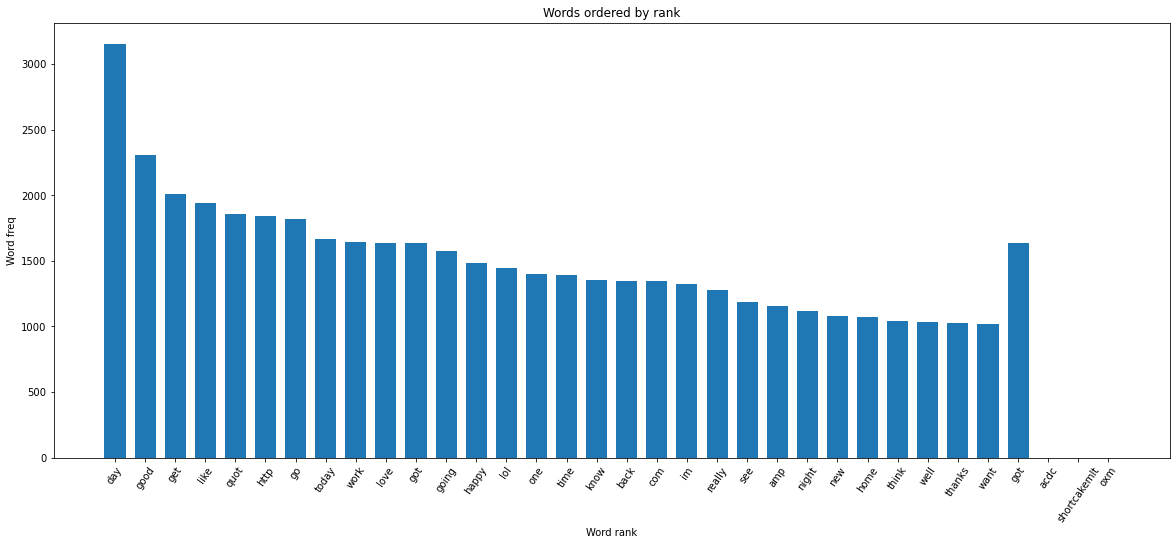

In [153]:
# Vobabulary analysis
stopwords = nltk.corpus.stopwords.words('english')
vec = CountVectorizer(stop_words=stopwords)
X = vec.fit_transform(corpus)
words = vec.get_feature_names()

print("\nVocabulary size : %d\n-----------------\n" % len(words) )
print("Plotting word distrib of the second dataset (data world):\n---------------------------------------------------------")

# Compute rank
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]
# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x, step=15000):
    return np.hstack((x[:30], x[10::step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('Word rank')
plt.ylabel('Word freq')
plt.title("Words ordered by rank");

In [133]:
res = run_pipes([pipe0, pipe2, pipe30, pipe1, pipe4, pipe51, pipe31, pipe3, pipe6, pipe61, pipe7, pipe71, pipe8, pipe81], splits=5)
print_table(res)

/home/dan/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/dan/anaconda3/envs/dataviz/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,time,f1_score
vect-sgd,1.91,"[0.17694, 0.00322]"
vect-tfidf-sgd,1.18,"[0.17667, 0.00293]"
feat-sgd,67.20,"[0.18068, 0.00498]"
vect-svm,490.58,"[0.1838, 0.00157]"
vect-tfidf-svm,258.78,"[0.17744, 0.00375]"
vect-logit,45.11,"[0.17973, 0.00296]"
vect-svml,35.10,"[0.16542, 0.00368]"
vect-tfidf-svl,2.98,"[0.17417, 0.00252]"
vect-mult_nb,0.62,"[0.11959, 0.00159]"
vect-tfidf-mult_nb,0.65,"[0.08481, 0.00125]"


* ### Results (<18%) are less good (slow to compute) even if the docs are twice more numerous (>48000)M is a pain
### It can be explained by the increase in the number of targets (6=>13)

* ### My solution is to group targets in order to have the same complexity as the first dataset (surprise, love, fear,  anger, sadness and happy)        

* ### Also, I remove neutral and empty columns in order to get same type of data



In [140]:
pipe42 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SVC())
])

In [141]:
res = run_pipes([pipe42], splits=5)
print_table(res)

,time,f1_score
vect-tfidf-svm,470.89,"[0.16319, 0.00213]"


### Waiting the SVC results

In [178]:
# J'efface les lignes où 'neutral' ou 'empty' apparaissent
df2 = df2[(df2.Emotion != "neutral")]
df2 = df2[(df2.Emotion != "empty")]
df2.shape

(30535, 2)

In [179]:
# Je fais ma tambouille en renommant les colonnes pour avoir le même type de que le dataset Kaggle 
df2['Emotion'] = df2['Emotion'].replace(['happiness'], 'happy')
df2['Emotion'] = df2['Emotion'].replace(['boredom'], 'sadness')
df2['Emotion'] = df2['Emotion'].replace(['enthusiasm'], 'happy')
df2['Emotion'] = df2['Emotion'].replace(['hate'], 'anger')
df2['Emotion'] = df2['Emotion'].replace(['relief'], 'happy')
df2['Emotion'] = df2['Emotion'].replace(['fun'], 'happy')
df2['Emotion'] = df2['Emotion'].replace(['worry'], 'fear')

In [180]:
# Je crée un df3 le nouveau dataset avec plus de données
df3 = df.append(df2[['Text','Emotion']],ignore_index=True)

In [181]:
df3['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [182]:
df3.shape

(51994, 2)

In [183]:
targets = df3["Emotion"]
corpus = df3["Text"]

In [184]:
print("Dimension :", df.shape, "\n-----------")
print("\nDatas format :\n--------------\n", df.dtypes)
print("\n# of empty cells :\n------------------\n", df.isnull().sum())
print("\nValues of the emotion column :\n------------------------------\n", df.Emotion.unique())

df_author = df3.groupby(['Emotion']).size().sort_values()
print("\nEmotion's word frequency in the df :\n------------------------------------\n", df_author)

Dimension : (21459, 2) 
-----------

Datas format :
--------------
 Text       object
Emotion    object
dtype: object

# of empty cells :
------------------
 Text       0
Emotion    0
dtype: int64

Values of the emotion column :
------------------------------
 ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']

Emotion's word frequency in the df :
------------------------------------
 Emotion
surprise     3066
anger        4426
love         5483
fear        11111
sadness     11609
happy       16299
dtype: int64


In [187]:
targets = df3["Emotion"]
corpus = df3["Text"]


Vocabulary size : 48681
-----------------

Plotting words distribution of the mixed dataset (data world):
--------------------------------------------------------------


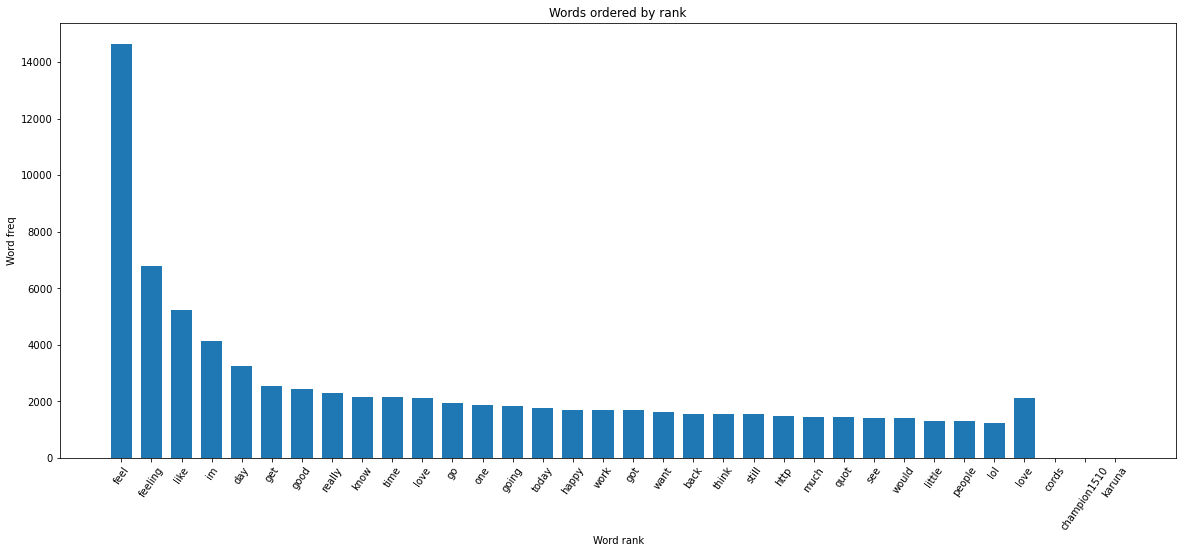

In [188]:
# Vobabulary analysis
stopwords = nltk.corpus.stopwords.words('english')
vec = CountVectorizer(stop_words=stopwords)
X = vec.fit_transform(corpus)
words = vec.get_feature_names()

print("\nVocabulary size : %d\n-----------------\n" % len(words) )
print("Plotting words distribution of the mixed dataset (data world):\n--------------------------------------------------------------")

# Compute rank
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]
# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x, step=15000):
    return np.hstack((x[:30], x[10::step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('Word rank')
plt.ylabel('Word freq')
plt.title("Words ordered by rank");

In [189]:
#res = run_pipes([pipe0, pipe2, pipe30, pipe1, pipe4, pipe51, pipe31, pipe3, pipe6, pipe61, pipe7, pipe71, pipe8, pipe81], splits=5)
res = run_pipes([pipe0, pipe2, pipe51, pipe31, pipe3, pipe6, pipe61, pipe7, pipe71, pipe8, pipe81], splits=5)
print_table(res)

,time,f1_score
vect-sgd,1.83,"[0.56929, 0.00393]"
vect-tfidf-sgd,1.23,"[0.55688, 0.00419]"
vect-logit,28.61,"[0.56077, 0.00249]"
vect-svml,25.17,"[0.5397, 0.00319]"
vect-tfidf-svl,2.49,"[0.5606, 0.00252]"
vect-mult_nb,0.83,"[0.40474, 0.00232]"
vect-tfidf-mult_nb,0.87,"[0.27992, 0.00229]"
vect-compl_nb,0.84,"[0.54638, 0.00366]"
vect-tfidf-compl_nb,0.87,"[0.53619, 0.00575]"
vect-bern_nb,0.83,"[0.30687, 0.00265]"


* ### Results gives better results than using 13 targets but they have difficulties to exceed 57%...